In [307]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [308]:
df = pd.read_csv('https://raw.githubusercontent.com/bruizel/dados-LastFM/825c04dc6540b9725e6d2f165c6de1b2a9004baf/dados.csv')
#df = pd.read_csv('dados.csv')

In [309]:
df.head()

,Artist,Album,Song,Data
0,Billie Eilish,HIT ME HARD AND SOFT,Hit Me Hard And Soft,20 May 2024 21:02
1,Billie Eilish,HIT ME HARD AND SOFT,Blue,20 May 2024 21:02
2,Billie Eilish,HIT ME HARD AND SOFT,BITTERSUITE,20 May 2024 20:55
3,Billie Eilish,HIT ME HARD AND SOFT,The Diner,20 May 2024 20:50
4,Billie Eilish,HIT ME HARD AND SOFT,L’Amour De Ma Vie,20 May 2024 20:47


In [310]:
df.shape

(31400, 4)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31400 entries, 0 to 31399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  31400 non-null  object
 1   Album   31355 non-null  object
 2   Song    31400 non-null  object
 3   Data    31400 non-null  object
dtypes: object(4)
memory usage: 981.4+ KB


In [312]:
df.describe()

,Artist,Album,Song,Data
count,31400,31355,31400,31400
unique,1824,4198,6739,30959
top,Gorillaz,Cracker Island (Deluxe),Little Dark Age,13 Nov 2022 20:46
freq,854,296,76,4


In [313]:
#Conferinfo de há campos vazios
df.isna().sum()

Artist     0
Album     45
Song       0
Data       0
dtype: int64

In [314]:
#Substituindo todos os albums vazios com 'No album'
df = df.fillna('No album')

In [315]:
#Conferinfo de há campos vazios
df.isna().sum()

Artist    0
Album     0
Song      0
Data      0
dtype: int64

Text(0, 0.5, '')

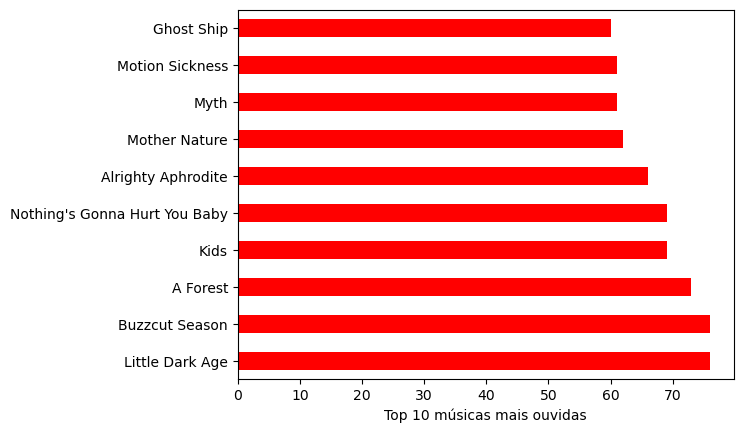

In [316]:
#Top 10 Artistas mais ouvidos
ax = df['Song'].value_counts().head(10).plot(kind = 'barh', color = 'red');
ax.set_xlabel('Músicas')
ax.set_xlabel('Top 10 músicas mais ouvidas')
ax.set_ylabel('')

In [317]:
#Convertendo a coluna Data para o formato DateTime
df['Data'] = pd.to_datetime(df['Data'], format = '%d %b %Y %H:%M')

In [318]:
#Deixando apenas o ano
df['Data'] = df['Data'].dt.date


Text(0.5, 1.0, 'Top 5 artistas mais ouvidos')

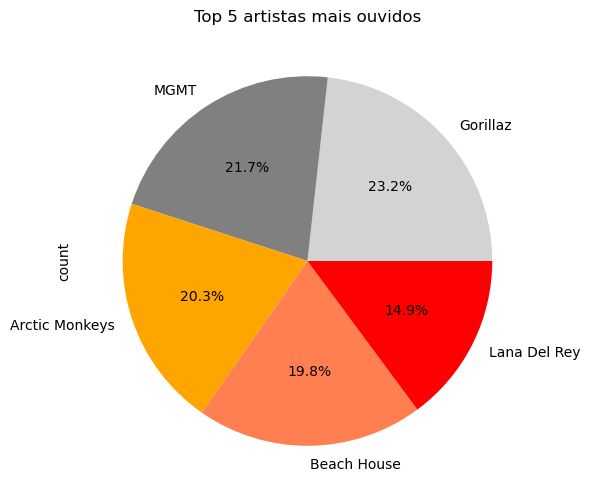

In [319]:
# gráfico de pizza
plt.figure(figsize = (10,6))
df['Artist'].value_counts().head(5).plot(kind = 'pie', autopct = '%1.1f%%',colors = [ 'lightgray','gray', 'orange', 'coral', 'red'])
plt.title('Top 5 artistas mais ouvidos')

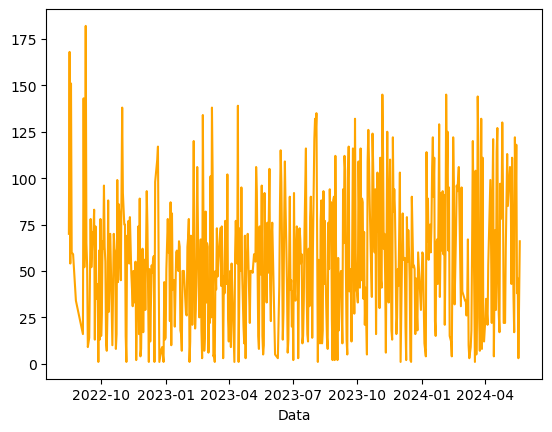

In [320]:
ax = df.groupby('Data')['Song'].count().plot(kind='line', color='orange')
ax.index = [2023, 2024]
ax.figsize = (10, 5)
plt.show()